<a href="https://colab.research.google.com/github/hildazaqya/project-capstone/blob/main/firna/Foodection%20mobilenetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data from Kaggle

This data is collect mannually from many website, dan also in the data was captured using a smartphone camera.

In [ ]:
#kaggle
!pip install kaggle

In [1]:
#this file from kaggle API personnal account
from google.colab import files

# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smjayyy","key":"a86a230a085a77cff7a5851725589584"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#link dataset in Kaggle.com
!kaggle datasets download -d alinesellwia/foodection-vegetable-and-fruit-dataset/

100% 2.10G/2.10G [02:22<00:00, 18.4MB/s]
100% 2.10G/2.10G [02:22<00:00, 15.8MB/s]


In [4]:
#new directory for stores temporary data
!mkdir data

In [5]:
#unzip the data
!unzip -q foodection-vegetable-and-fruit-dataset.zip -d /content/data

#Install Library

In [6]:
#Train Data, Augmentation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout

#Transfer Learning
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNetV2

#optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

#interach with OS -> make directory
import os

#Visualization
%matplotlib inline

import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Set the directory to easily navigate to the generator

In [7]:
base_dir= '/content/data/Foodection Dataset'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/test'))

Contents of base directory:
['test', 'train']

Contents of train directory:
['wortel_segar_sedang', 'tomat_segar_sedang', 'jeruk_segar_sedang', 'tomat_busuk', 'tomat_segar', 'wortel_segar', 'wortel_busuk', 'jeruk_segar', 'jeruk_busuk']

Contents of validation directory:
['wortel_segar_sedang', 'jeruk_segar_sedang', 'tomat_busuk', 'tomat_segar', 'tomat _segar_sedang', 'wortel_segar', 'wortel_busuk', 'jeruk_segar', 'jeruk_busuk']


In [10]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Specify class of the directory train
train_jeruksegar_dir = os.path.join(train_dir, 'jeruk_segar')
train_wortelsegar_dir = os.path.join(train_dir, 'wortel_segar')
train_wortelsegarsedang_dir = os.path.join(train_dir, 'wortel_segar')
train_tomatbusuk_dir = os.path.join(train_dir, 'tomat_busuk')
train_jeruksegarsedang_dir = os.path.join(train_dir, 'jeruk_segar_sedang')
train_jerukbusuk_dir = os.path.join(train_dir, 'jeruk_busuk')
train_wortelbusuk_dir = os.path.join(train_dir, 'wortel_busuk')
train_tomatsegar_dir = os.path.join(train_dir, 'tomat_segar')
train_tomatsegarsedang_dir = os.path.join(train_dir, 'tomat_segar_sedang')

# Specify class of the directory test
test_jeruksegar_dir = os.path.join(test_dir, 'jeruk_segar')
test_wortelsegar_dir = os.path.join(test_dir, 'wortel_segar')
test_wortelsegarsedang_dir = os.path.join(test_dir, 'wortel_segar_sedang')
test_tomatbusuk_dir = os.path.join(test_dir, 'tomat_busuk')
test_jeruksegarsedang_dir = os.path.join(test_dir, 'jeruk_segar_sedang')
test_jerukbusuk_dir = os.path.join(test_dir, 'jeruk_busuk')
test_wortelbusuk_dir = os.path.join(test_dir, 'wortel_busuk')
test_tomatsegar_dir = os.path.join(test_dir, 'tomat_segar')
test_tomatsegarsedang_dir = os.path.join(test_dir, 'tomat _segar_sedang')

In [11]:
train_jeruksegar_fnames = os.listdir(train_jeruksegar_dir)
train_wortelsegar_fnames = os.listdir(train_wortelsegar_dir)
train_wortelsegarsedang_fnames = os.listdir(train_wortelsegarsedang_dir)
train_tomatbusuk_fnames = os.listdir(train_tomatbusuk_dir)
train_jeruksegarsedang_fnames = os.listdir(train_jeruksegarsedang_dir)
train_jerukbusuk_fnames = os.listdir(train_jerukbusuk_dir)
train_wortelbusuk_fnames = os.listdir(train_wortelbusuk_dir)
train_tomatsegar_fnames = os.listdir(train_tomatsegar_dir)
train_tomatsegarsedang_fnames = os.listdir(train_tomatsegarsedang_dir)

print(train_jeruksegar_fnames[:10])
print(train_wortelsegar_fnames[:10])

['jeruk_segar (57).jpg', 'jeruk_segar (653).jpg', 'jeruk_segar (405).png', 'jeruk_segar (316).png', 'jeruk_segar (117).png', 'jeruk_segar (77).png', 'jeruk_segar (65).png', 'jeruk_segar (857).png', 'jeruk_segar (685).png', 'jeruk_segar (845).png']
['wortel_segar (784).jpg', 'wortel_segar (1130).jpg', 'wortel_segar (499).jpg', 'wortel_segar (1770).jpg', 'wortel_segar (1527).jpg', 'wortel_segar (127).jpg', 'wortel_segar (1051).jpg', 'wortel_segar (1101).jpg', 'wortel_segar (680).jpg', 'wortel_segar (478).jpg']


# Every Class Len

In [12]:
print('total training jeruk segar images :', len(os.listdir(train_jeruksegar_dir)))
print('total training wortel segar images :', len(os.listdir( train_wortelsegar_dir)))
print('total training wortel segar sedang images :', len(os.listdir(train_wortelsegarsedang_dir)))
print('total training tomat busuk images :', len(os.listdir(train_tomatbusuk_dir)))
print('total training jeruk segar sedang images :', len(os.listdir(train_jeruksegarsedang_dir)))
print('total training jeruk busuk images :', len(os.listdir(train_jerukbusuk_dir)))
print('total training wortel busuk images :', len(os.listdir(train_wortelbusuk_dir)))
print('total training tomat segar images :', len(os.listdir(train_tomatsegar_dir)))
print('total training tomat segar sedang images :', len(os.listdir(train_tomatsegarsedang_dir)))

print('total testing jeruk segar images :', len(os.listdir(test_jeruksegar_dir)))
print('total testing wortel segar images :', len(os.listdir(test_wortelsegar_dir)))
print('total testing wortel segar sedang images :', len(os.listdir(test_wortelsegarsedang_dir)))
print('total testing tomat busuk images :', len(os.listdir(test_tomatbusuk_dir)))
print('total testing jeruk segar sedang images :', len(os.listdir(test_jeruksegarsedang_dir)))
print('total testing jeruk busuk images :', len(os.listdir(test_jerukbusuk_dir)))
print('total testing wortel busuk images :', len(os.listdir(test_wortelbusuk_dir)))
print('total testing tomat segar images :', len(os.listdir(test_tomatsegar_dir)))
print('total testing tomat segar sedang images :', len(os.listdir(test_tomatsegarsedang_dir)))

total training jeruk segar images : 1569
total training wortel segar images : 2197
total training wortel segar sedang images : 2197
total training tomat busuk images : 1115
total training jeruk segar sedang images : 791
total training jeruk busuk images : 1119
total training wortel busuk images : 858
total training tomat segar images : 4745
total training tomat segar sedang images : 3084
total testing jeruk segar images : 673
total testing wortel segar images : 942
total testing wortel segar sedang images : 132
total testing tomat busuk images : 478
total testing jeruk segar sedang images : 340
total testing jeruk busuk images : 480
total testing wortel busuk images : 368
total testing tomat segar images : 2033
total testing tomat segar sedang images : 1321


#Check With Visualization

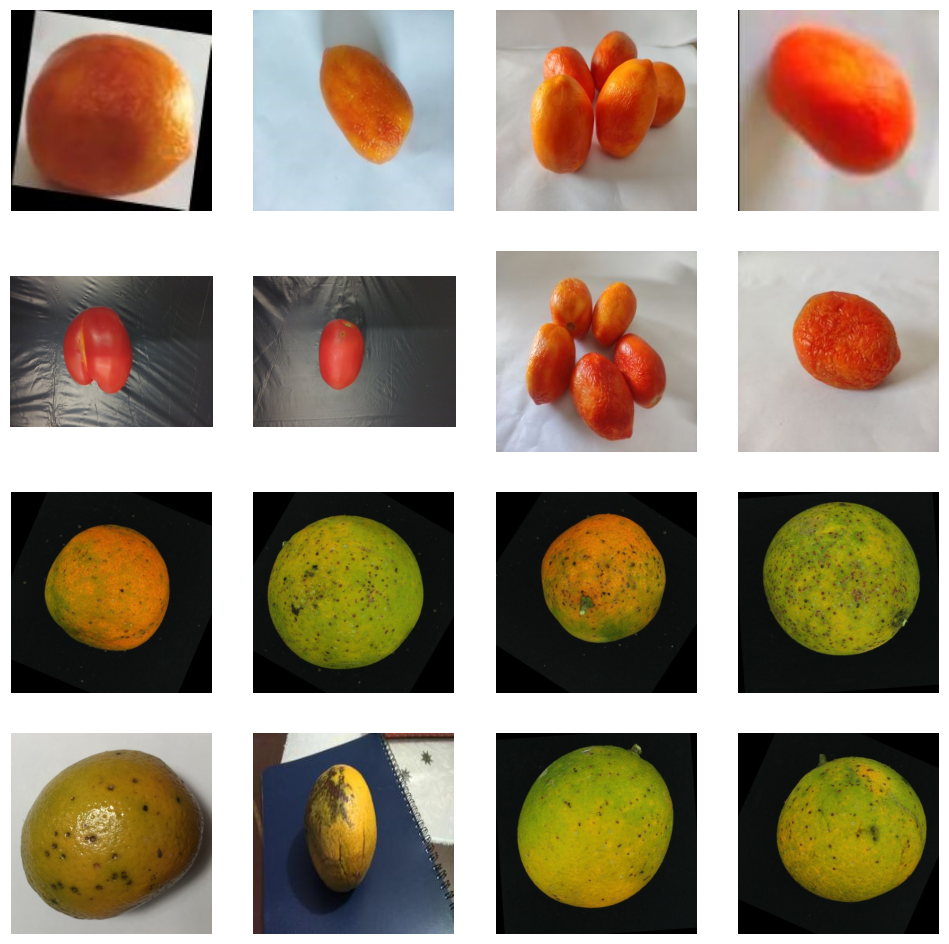

In [13]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0  # Add a line break here

fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

pic_index += 8

next_tomatsegarsedang_pix = [os.path.join(train_tomatsegarsedang_dir, fname)
                            for fname in train_tomatsegarsedang_fnames[pic_index - 8:pic_index]
                            ]

next_jeruksegarsedang_pix = [os.path.join(train_jeruksegarsedang_dir, fname)
                            for fname in train_jeruksegarsedang_fnames[pic_index - 8:pic_index]
                            ]

for i, img_path in enumerate(next_tomatsegarsedang_pix  + next_jeruksegarsedang_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')  # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

#Make Augmentation

In [14]:
img_height = 224
img_width = 224
img_channels = 3
num_epochs = 10

train_datagen = ImageDataGenerator( rescale = 1.0/255.,
                                   horizontal_flip=True,
                                    vertical_flip=True)
test_datagen  = ImageDataGenerator( rescale = 1.0/255.)

train_generator= train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 15780 images belonging to 9 classes.
Found 6767 images belonging to 9 classes.


Transfer Learning MobileNet

In [15]:
# Load pre-trained MobileNetV2 model
mobile_net_v2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in mobile_net_v2.layers:
    layer.trainable = False

# Choose a specific layer for feature extraction
x = layers.Flatten()(mobile_net_v2.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(9, activation='softmax')(x)

model = Model(mobile_net_v2.input, x)

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 [==============================] - 2s 0us/step


In [16]:
history = model.fit(train_generator, epochs=num_epochs, validation_data=test_generator)

Epoch 1/10
317/789 [===========>..................] - ETA: 1:05 - loss: 0.7415 - accuracy: 0.7721

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


789/789 [==============================] - 156s 181ms/step - loss: 0.5654 - accuracy: 0.8354 - val_loss: 3.8011 - val_accuracy: 0.5106
Epoch 2/10
789/789 [==============================] - 143s 182ms/step - loss: 0.3175 - accuracy: 0.9153 - val_loss: 3.6531 - val_accuracy: 0.5197
Epoch 3/10
789/789 [==============================] - 143s 181ms/step - loss: 0.2516 - accuracy: 0.9334 - val_loss: 3.9705 - val_accuracy: 0.5250
Epoch 4/10
789/789 [==============================] - 140s 177ms/step - loss: 0.2275 - accuracy: 0.9406 - val_loss: 4.3682 - val_accuracy: 0.5760
Epoch 5/10
789/789 [==============================] - 137s 173ms/step - loss: 0.2010 - accuracy: 0.9471 - val_loss: 3.7799 - val_accuracy: 0.5729
Epoch 6/10
789/789 [==============================] - 138s 175ms/step - loss: 0.1736 - accuracy: 0.9559 - val_loss: 4.3327 - val_accuracy: 0.5667
Epoch 7/10
789/789 [==============================] - 144s 182ms/step - loss: 0.1640 - accuracy: 0.9563 - val_loss: 5.5000 - val_accura

339/339 [==============================] - 37s 107ms/step


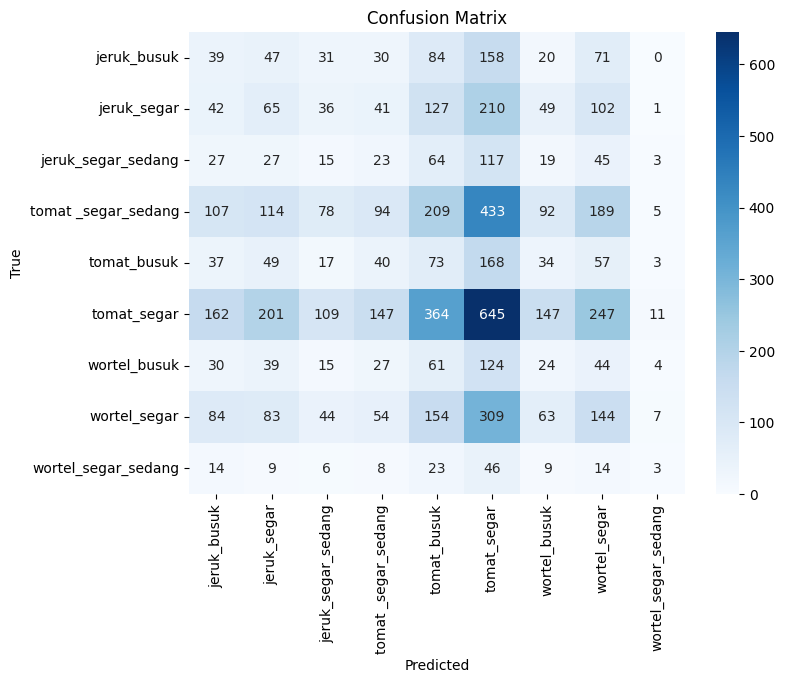


Classification Report:
                      precision    recall  f1-score   support

        jeruk_busuk       0.07      0.08      0.08       480
        jeruk_segar       0.10      0.10      0.10       673
 jeruk_segar_sedang       0.04      0.04      0.04       340
tomat _segar_sedang       0.20      0.07      0.11      1321
        tomat_busuk       0.06      0.15      0.09       478
        tomat_segar       0.29      0.32      0.30      2033
       wortel_busuk       0.05      0.07      0.06       368
       wortel_segar       0.16      0.15      0.16       942
wortel_segar_sedang       0.08      0.02      0.04       132

           accuracy                           0.16      6767
          macro avg       0.12      0.11      0.11      6767
       weighted avg       0.18      0.16      0.16      6767



In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# ...

# Setelah Anda melatih model, lakukan prediksi pada data uji
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Dapatkan label yang benar
y_true = test_generator.classes

# Buat confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Tampilkan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan laporan klasifikasi
print('\nClassification Report:\n', classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

Text(0.5, 1.0, 'Training and validation loss')

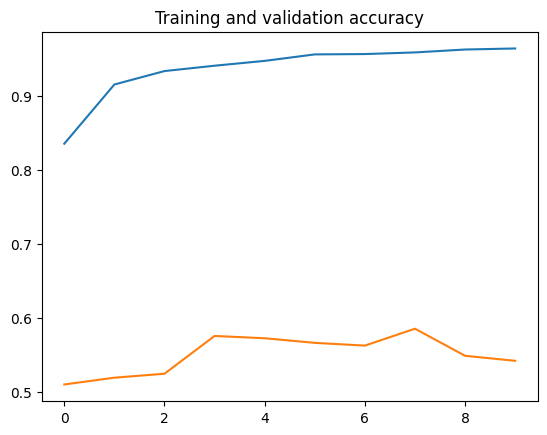

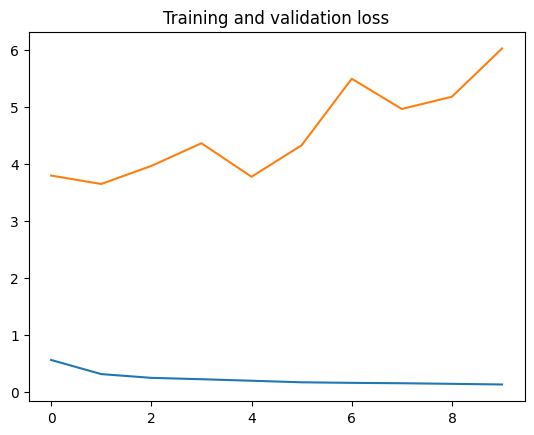

In [18]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

Model Description Experiment :

1. CNN-3(Trainacc=98 Valacc=43 time=10m25s)Overfitting
   * epoch 10
   * batch size 20
   * augmentation rescale(val and train)
   * no drop out
2. RestNet50(Trainacc=69,60 valacc=24,35 time=8m51s)Overfitting
   * epoch 10
   * batch size 20
   * augmentation rescale(val and train)
   * no drop out
3. MobileNet(Trainacc=96,89 valacc=52,10 time=11m45s)
   * epoch 10
   * batch size 20
   * augmentation rescale, horizontal flip,vertical flip,zoom range 0.2, fill mode nearest(train) and rescale,zoom range (val)
   * dropout(0,5)
4. MobileNet V2(Train Accuracy=96 val=54 time=23m)
   * input size 224 x 224
   * new dataset
   * double drop out (0,2)